<a href="https://colab.research.google.com/github/ValentinoMalakianno/PCVK_2023/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Valentino Malakianno**
### **3G**
### **2141720099**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

##### 1. Buat Gamma Correction sesuai dengan petunjuk berikut
##### Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image dengan gamma correction sesuai rumus yang telah diberikan.

 Gamma Correction pada citra 
-------------------------------
Masukkan nilai Gamma: 3


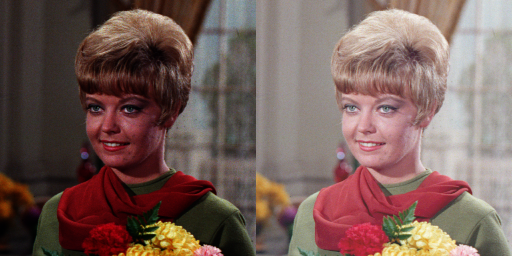

In [3]:
print(' Gamma Correction pada citra ')
print('-------------------------------')
try:
 gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
 print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_2023/Images/female.tiff')
gamma_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_image[y,x,c] = np.clip(255 * pow  (original[y,x,c] / 255, (1 / gamma)), 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

#####2. Buat Simulasi Image Depth
#####Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra,pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga 255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (0000000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika 7bit, maka jumlah warnanya adalah 27= 128, dst. Berikut adalah kode untuk membaca citra masukan dan memberi nilai kedalaman citra,silahkan lanjutkan kode program berikut sehingga menghasilkan keluaran seperti contoh pada Gambar.

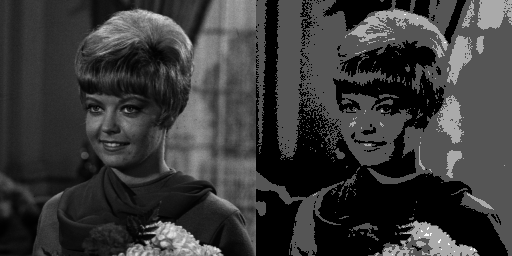

In [4]:
bit_depth = 2
level = 255 / (pow(2,bit_depth)-1)
image = cv.imread('/content/drive/MyDrive/PCVK_2023/Images/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(image.shape, image.dtype)

for i in range(image.shape[0]):
  for j in range(image.shape[1]):
    depth_image[i,j] = np.clip(round(image[i,j]/level) * level, 0, 255)

final_frame = cv.hconcat((image, depth_image))
cv2_imshow(final_frame)

#####3. Buat modul Average Denoising
#####Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab sebelumnya. Citra asli sudah disediakan pada /images/galaxy.jpg. 100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder , gunakan modul glob (import glob).

Nilai PSNR untuk citra 5  adalah 28.760637051029473 (dB)


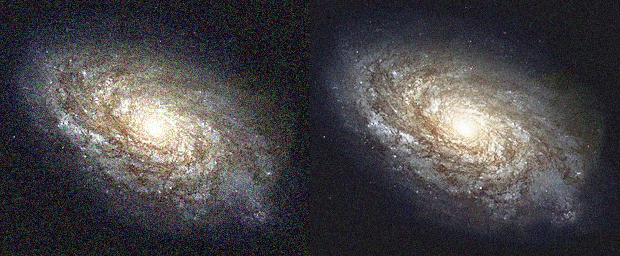

Nilai PSNR untuk citra 10  adalah 28.839413075496843 (dB)


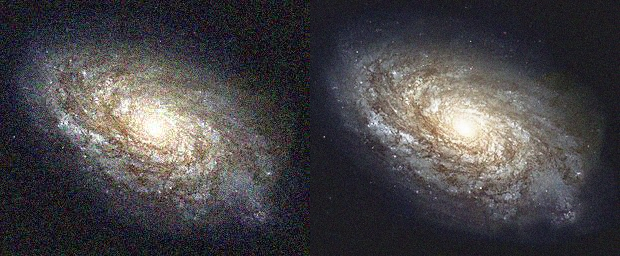

Nilai PSNR untuk citra 20  adalah 28.955397372272888 (dB)


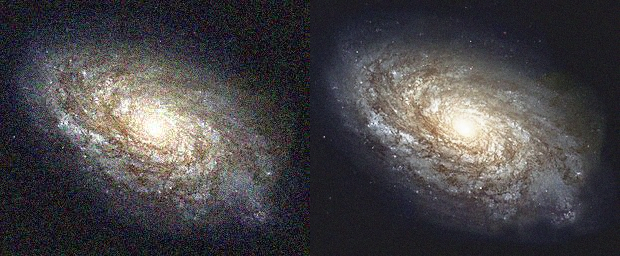

Nilai PSNR untuk citra 40  adalah 28.930379670074892 (dB)


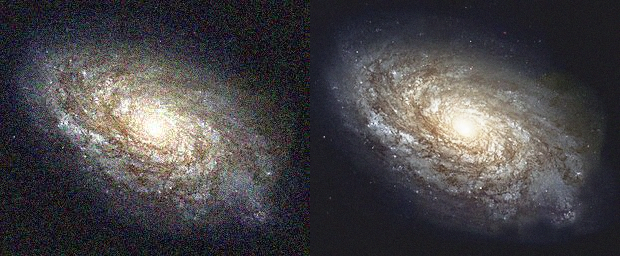

Nilai PSNR untuk citra 80  adalah 28.918680964241883 (dB)


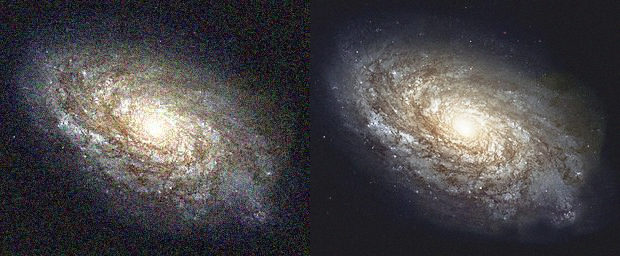

Nilai PSNR untuk citra 100  adalah 28.919467918770895 (dB)


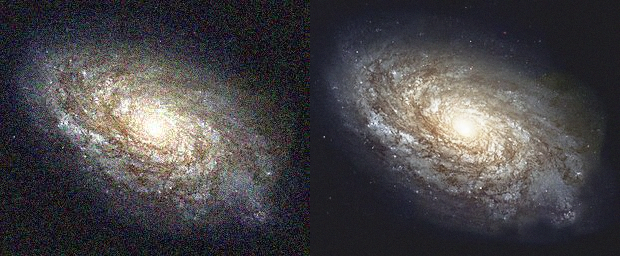

In [22]:
import glob
from math import log10, sqrt
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

original = cv.imread('/content/drive/MyDrive/PCVK_2023/Images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK_2023/Images/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

def calculate_average_psnr(cv_img, noise_number):
    dst = cv_img[0]
    for i in range(noise_number):
        if i == 0:
            pass
        else:
            alpha = 1.0 / (i + 1)
            beta = 1.0 - alpha
            dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

    def PSNR(original, compressed):
        mse = np.mean((original - compressed) ** 2)
        if mse == 0:
            return 100
        max_pixel = 255.0
        psnr = 20 * log10(max_pixel / sqrt(mse))
        return psnr

    compressed = dst
    psnr = PSNR(original, compressed)

    print(f'Nilai PSNR untuk citra {noise_number}  adalah {psnr} (dB)')
    galaxy_frame = cv.hconcat((original, dst))
    cv2_imshow(galaxy_frame)

calculate_average_psnr(cv_img, 5)
calculate_average_psnr(cv_img, 10)
calculate_average_psnr(cv_img, 20)
calculate_average_psnr(cv_img, 40)
calculate_average_psnr(cv_img, 80)
calculate_average_psnr(cv_img, 100)

#####4. Buat image masking untuk image berikut. Image kiri adalah image asli ((images/couple.tiff),), sedangkan image paling kanan adalah hasilnya:

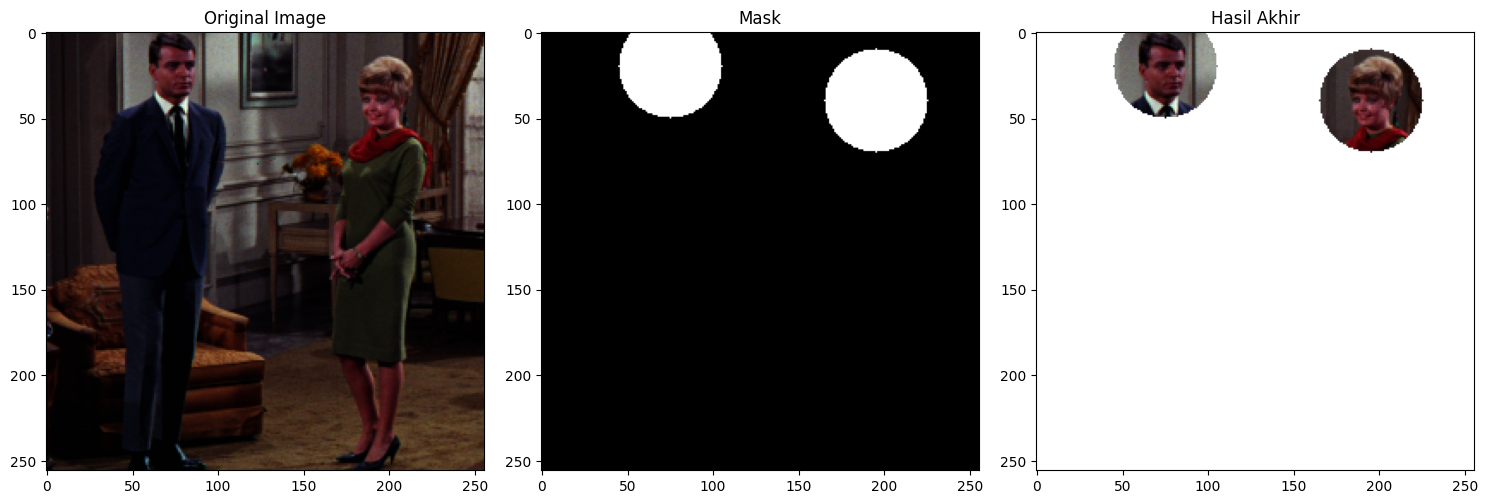

In [8]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar asli
image_path = '/content/drive/MyDrive/PCVK_2023/Images/couple.tiff'
original_image = cv.imread(image_path)

# Membuat maska dengan dua lingkaran putih
mask = np.zeros(original_image.shape[:2], dtype="uint8")
cv.circle(mask, (75, 20), 30, 255, -1)
cv.circle(mask, (195, 40), 30, 255, -1)

# Menggunakan operasi bitwise untuk mendapatkan bagian gambar yang ada di dalam maska
masked = cv.bitwise_and(original_image, original_image, mask=mask)

# Mengonversi gambar menjadi grayscale
tmp = cv.cvtColor(masked, cv.COLOR_BGR2GRAY)

# Menggunakan teknik thresholding
_, alpha = cv.threshold(tmp, 0, 255, cv.THRESH_BINARY)

# Memisahkan saluran warna Red, Green, Blue dari gambar asli
b, g, r = cv.split(masked)

# Membuat list yang berisi saluran warna Red, Green, Blue, dan saluran alpha
rgba = [b, g, r, alpha]

# Menggunakan cv.merge() untuk menggabungkan keempat saluran ke dalam gambar RGBA
final = cv.merge(rgba)

# Menampilkan gambar samping-sampingan menggunakan matplotlib
plt.figure(figsize=(15, 5))

# Gambar asli
plt.subplot(131)
plt.imshow(cv.cvtColor(original_image, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('on')

# Maska
plt.subplot(132)
plt.imshow(mask, cmap='gray')
plt.title('Mask')
plt.axis('on')

# Hasil akhir dengan latar belakang transparan
plt.subplot(133)
plt.imshow(cv.cvtColor(final, cv.COLOR_BGRA2RGBA))
plt.title('Hasil Akhir')
plt.axis('on')

plt.tight_layout()
plt.show()

#####5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini.
#####Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.
#####Operator NOT (Komplemen)

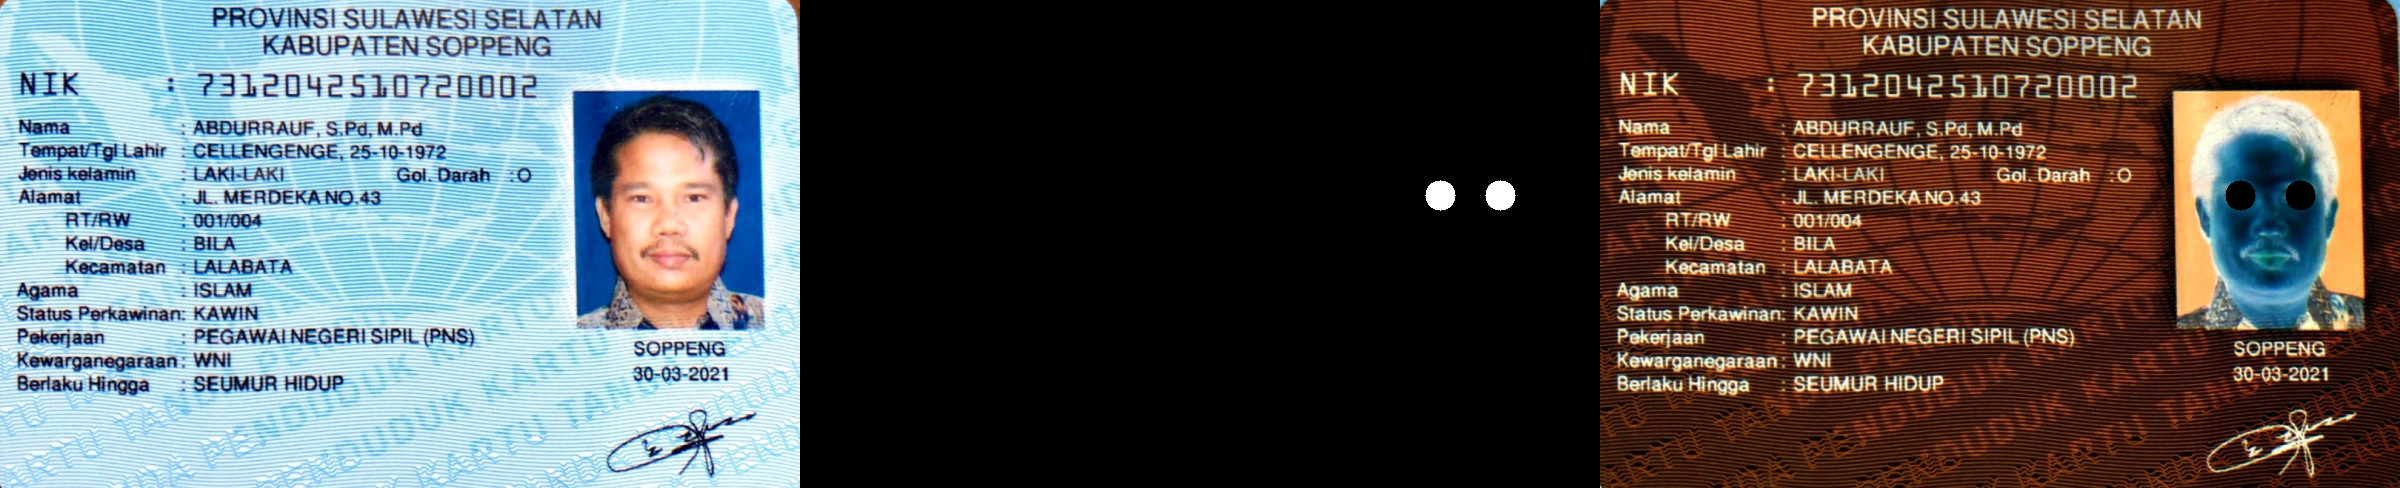

In [9]:
# Membaca gambar asli
original = cv.imread('/content/drive/MyDrive/PCVK_2023/Images/KTP.jpg')

# Membuat gambar mask dengan dua lingkaran berwarna putih (255, 255, 255)
mask = np.zeros(original.shape, dtype=np.uint8)
mask = cv.circle(mask, (640, 195), 15, (255, 255, 255), -1)
mask = cv.circle(mask, (700, 195), 15, (255, 255, 255), -1)

# Melakukan operasi NOT
masked = ~original & ~mask

# Menggabungkan hasil citra asli, mask dan hasil operasi NOT
final_frame = cv.hconcat((original, mask, masked))

# Menampilkan hasil
cv2_imshow(final_frame)

#####Operator OR (Atau)

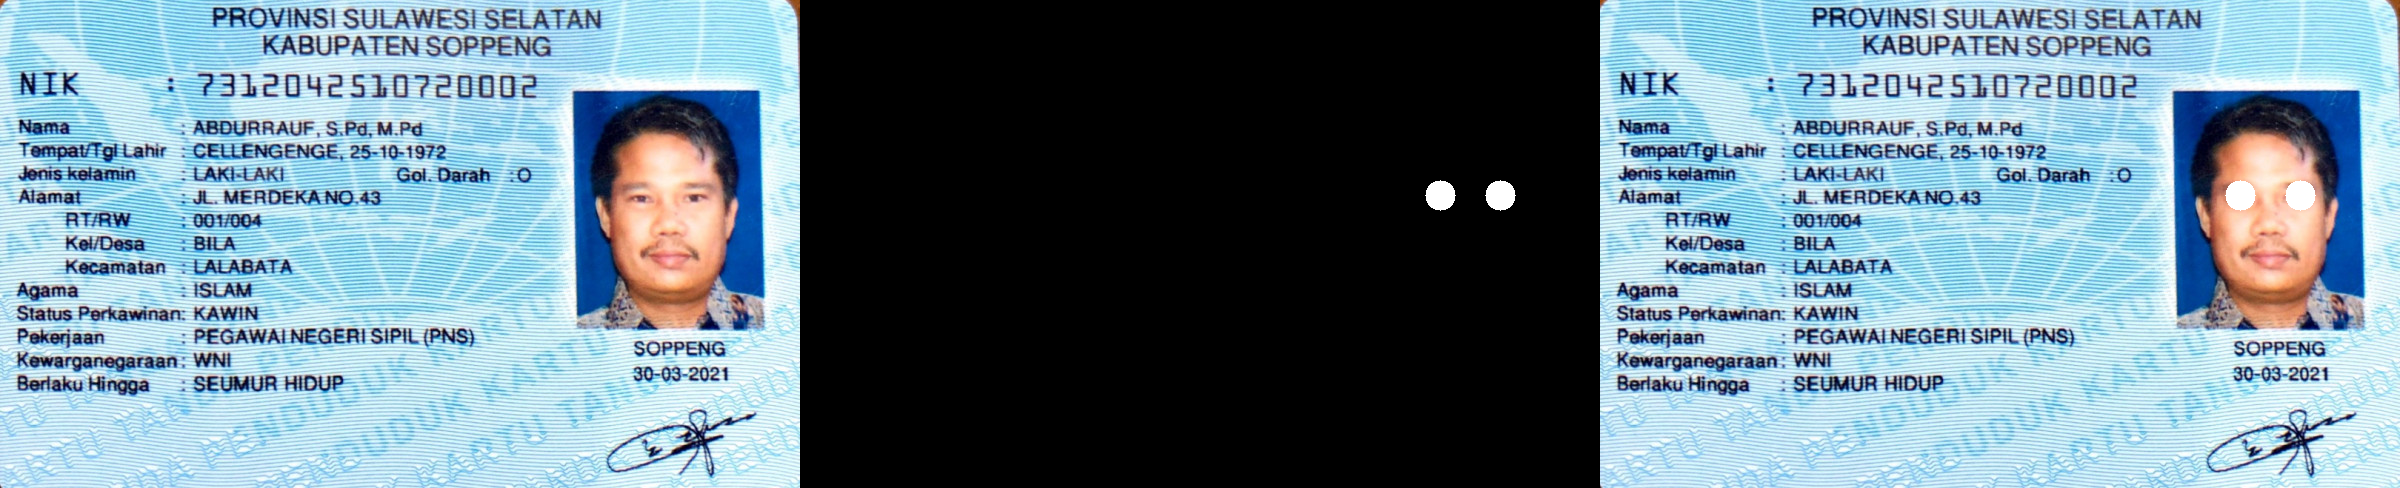

In [10]:
# Membaca gambar asli
original = cv.imread('/content/drive/MyDrive/PCVK_2023/Images/KTP.jpg')

# Membuat gambar mask dengan dua lingkaran berwarna putih (255, 255, 255)
mask = np.zeros(original.shape, dtype=np.uint8)
mask = cv.circle(mask, (640, 195), 15, (255, 255, 255), -1)
mask = cv.circle(mask, (700, 195), 15, (255, 255, 255), -1)

# Melakukan operasi OR
masked = original | mask

# Menggabungkan hasil citra asli, mask dan hasil operasi OR
final_frame = cv.hconcat((original, mask, masked))

# Menampilkan hasil
cv2_imshow(final_frame)

#####Operator AND (Dan)

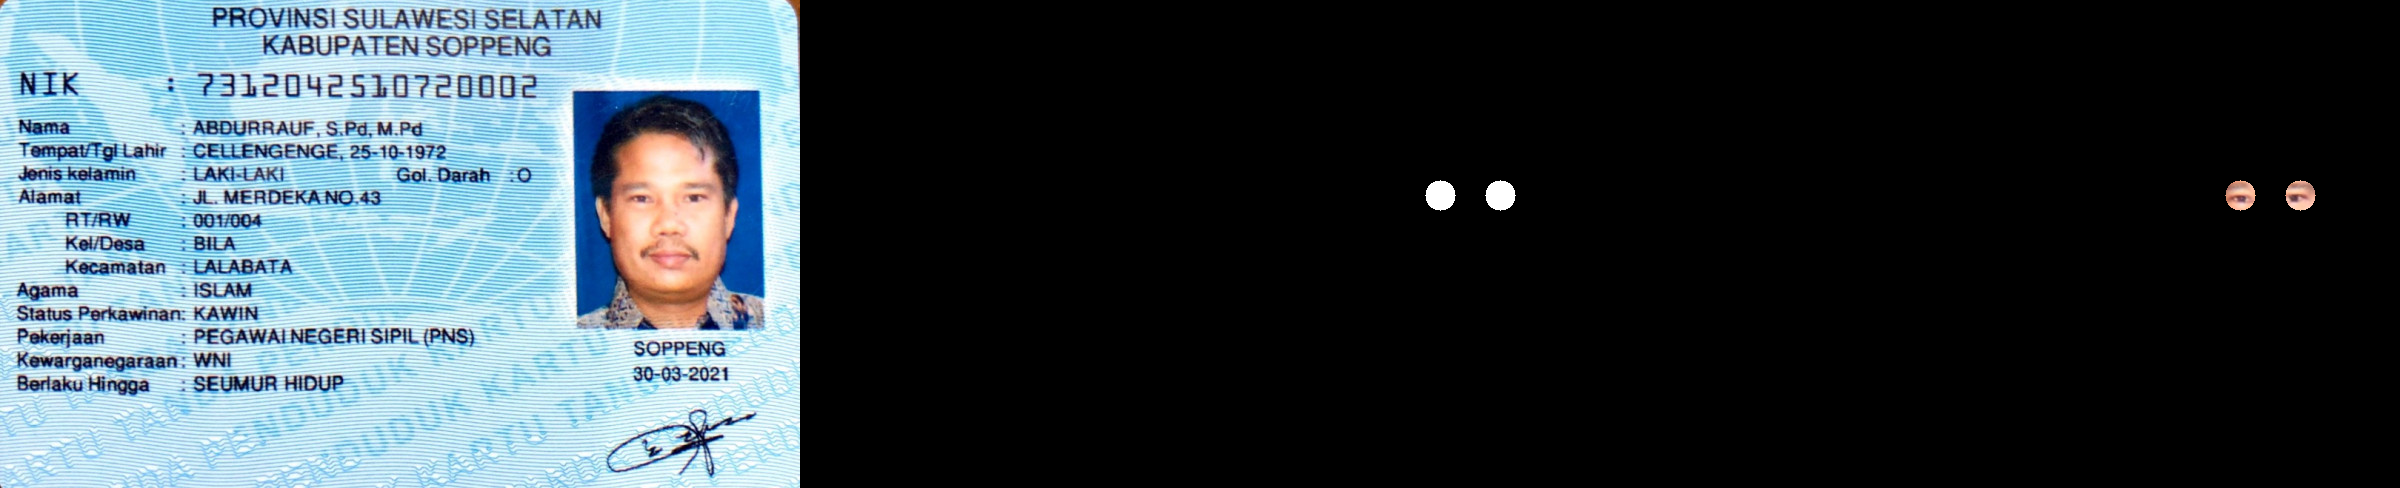

In [11]:
# Membaca gambar asli
original = cv.imread('/content/drive/MyDrive/PCVK_2023/Images/KTP.jpg')

# Membuat gambar mask dengan dua lingkaran berwarna putih (255, 255, 255)
mask = np.zeros(original.shape, dtype=np.uint8)
mask = cv.circle(mask, (640, 195), 15, (255, 255, 255), -1)
mask = cv.circle(mask, (700, 195), 15, (255, 255, 255), -1)

# Melakukan operasi AND bitwise antara gambar asli dan mask
masked = cv.bitwise_and(original, mask)

# Menggabungkan citra asli, mask, dan hasil AND bitwise
final_frame = cv.hconcat((original, mask, masked))

# Menampilkan hasil
cv2_imshow(final_frame)

#####Operator NAND (NOT AND)

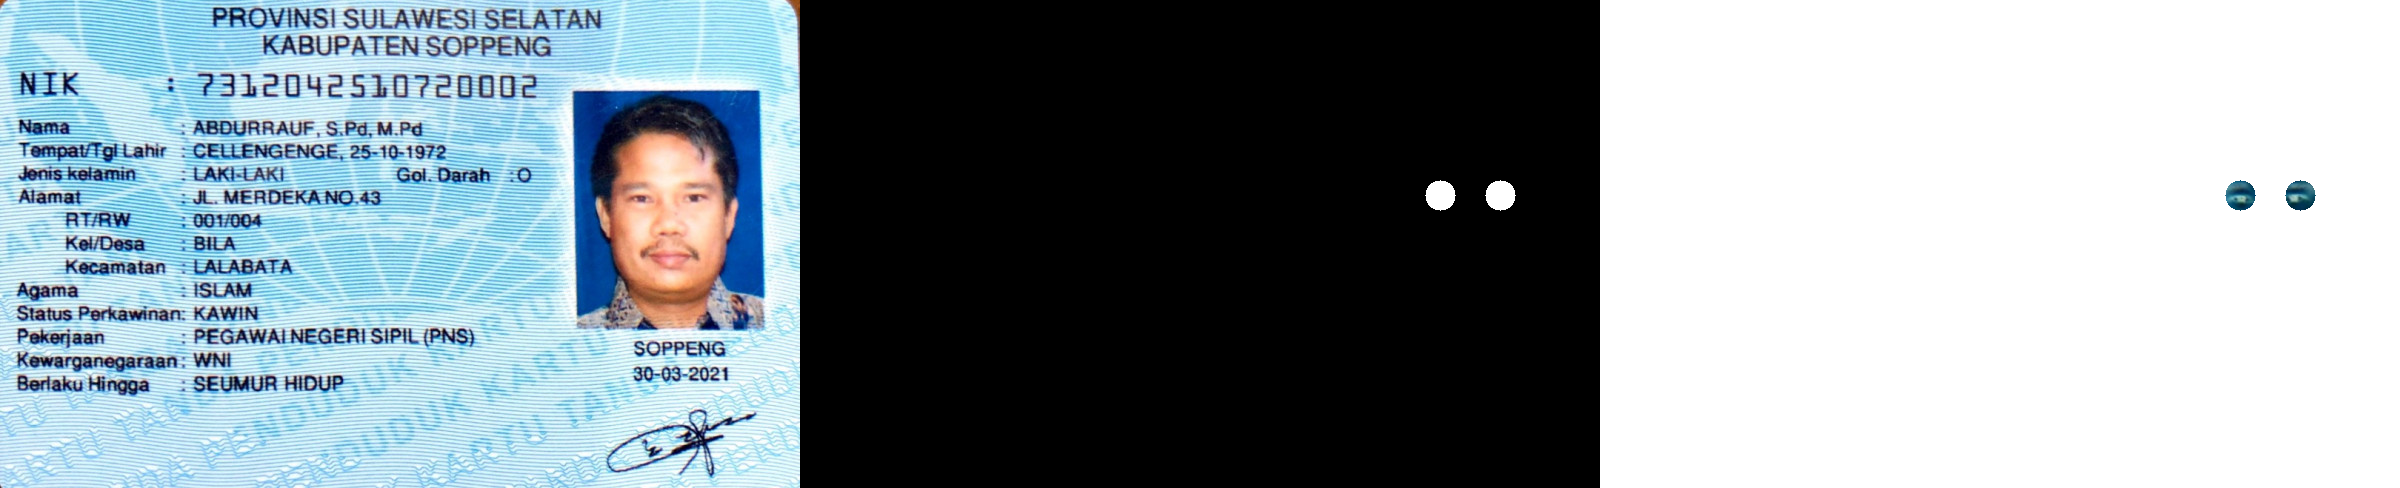

In [12]:
# Membaca gambar asli
original = cv.imread('/content/drive/MyDrive/PCVK_2023/Images/KTP.jpg')

# Membuat gambar mask dengan dua lingkaran berwarna putih (255, 255, 255)
mask = np.zeros(original.shape, dtype=np.uint8)
mask = cv.circle(mask, (640, 195), 15, (255, 255, 255), -1)
mask = cv.circle(mask, (700, 195), 15, (255, 255, 255), -1)

# Melakukan operasi AND bitwise antara gambar asli dan mask
and_result = cv.bitwise_and(original, mask)

# Melakukan operasi AND bitwise antara gambar asli dan mask
nand_result = cv.bitwise_not(and_result)

# Menggabungkan citra asli, mask, dan hasil NAND bitwise dalam satu frame
final_frame = cv.hconcat((original, mask, nand_result))

# Menampilkan hasil
cv2_imshow(final_frame)

#####Operator XOR (Exclusive OR)

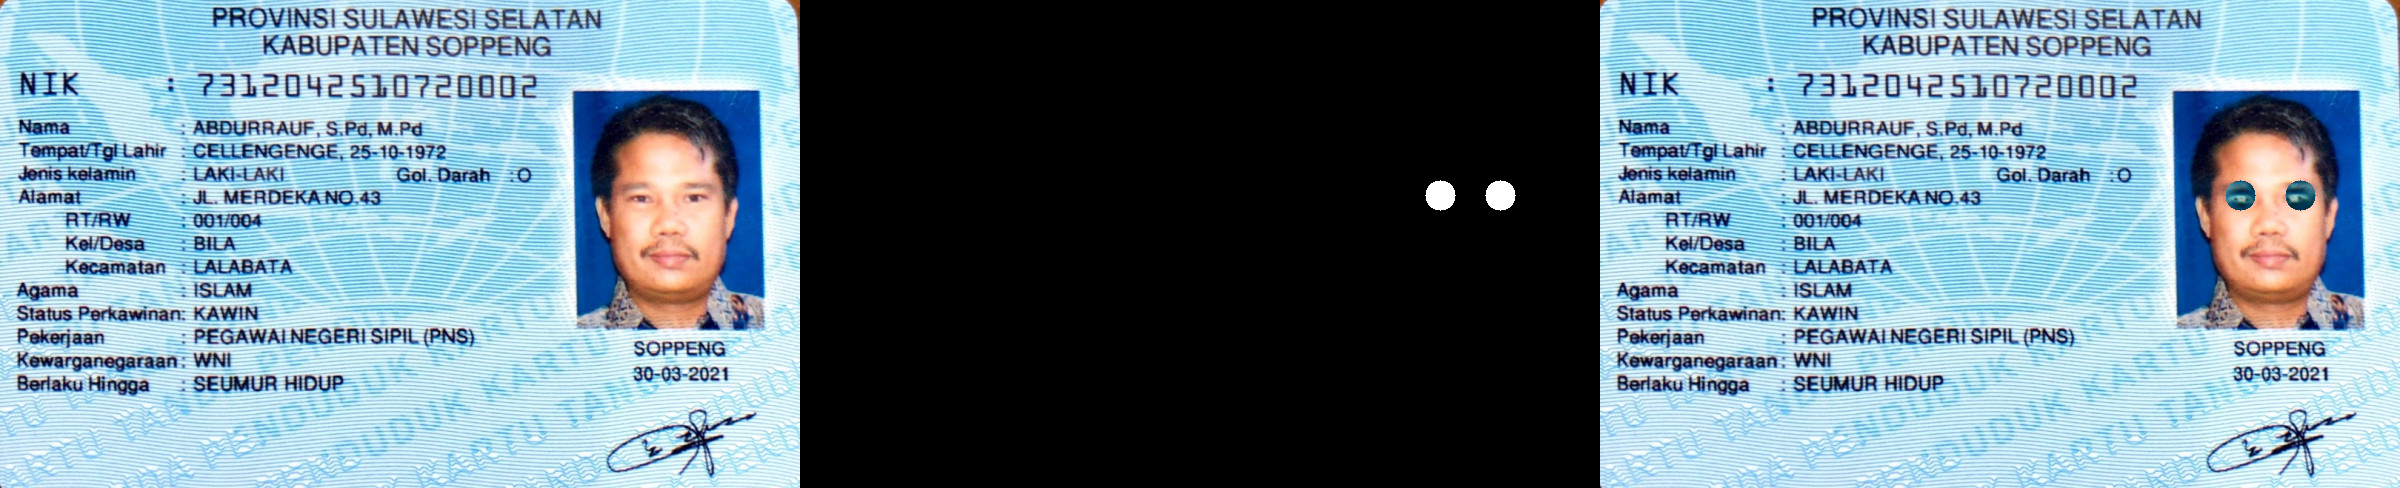

In [13]:
# Membaca gambar asli
original = cv.imread('/content/drive/MyDrive/PCVK_2023/Images/KTP.jpg')

# Membuat gambar mask dengan dua lingkaran berwarna putih (255, 255, 255)
mask = np.zeros(original.shape, dtype=np.uint8)
mask = cv.circle(mask, (640, 195), 15, (255, 255, 255), -1)
mask = cv.circle(mask, (700, 195), 15, (255, 255, 255), -1)

# Melakukan operasi AND bitwise antara gambar asli dan mask
masked = cv.bitwise_xor(original, mask)

# Menggabungkan citra asli, mask, dan hasil XOR bitwise dalam satu frame
final_frame = cv.hconcat((original, mask, masked))

# Menampilkan hasil
cv2_imshow(final_frame)

#####Operator NOT : Citra menjadi negatif.

Operator OR : Gabungan dua lingkaran putih pada citra asli dan akan menambahkan mask di citra

Operator AND : Area terbatas dari kedua lingkaran putih yang tumpang tindih.

Operator NAND : Area tumpang tindih menjadi negatif.

Operator XOR : Area yang tidak tumpang tindih dari kedua lingkaran putih.